<a href="https://colab.research.google.com/github/Higgins2718/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Copy_of_Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

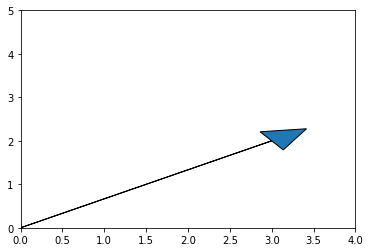

In [1]:
import matplotlib.pyplot as plt

a = [3, 2]
plt.xlim(0,4)
plt.ylim(0,5)
plt.arrow(0,0, a[0], a[1], head_width=0.5, head_length=0.5)

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [2]:
import numpy as np

b = [17, -4, -2, 1]

norm_b = np.linalg.norm(b)
norm_b


# It's a function for assigning a length/size to every vector in a vector space

17.60681686165901

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [3]:
c = np.array([3, 7, -2, 12])
d = np.array([9, -7, 4, 6])

np.dot(c, d)


42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [4]:
e = np.matrix([[7, 4, 2], [1, 3, -1], [2, 6, -4]])


inverse = np.linalg.inv(e)
print(inverse) 
e_transpose = np.matrix.transpose(e)
print(e_transpose)




[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]
[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [5]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [6]:
##### Your Code Here #####
import math
import statistics

customers_mean = np.sum(customers)/len(customers)
print("Mean of Customers")
print(customers_mean)
print(df['customers'].mean())

print("Variance of Customers")
customers_var = np.var(customers)
print(customers_var)
print(df['customers'].var(ddof=0))



print("Standard Deviation of Customers")

customers_std = np.std(customers)
print(customers_std)
print(df['customers'].std(ddof=0))

###
###

snow_mean = np.sum(snow)/len(snow)
print("Mean of Snow")
print(snow_mean)
print(df['snow'].mean())

print("Variance of Snow")
snow_var = np.var(snow)
print(snow_var)
print(df['snow'].var(ddof=0))



print("Standard Deviation of Snow")

snow_std = np.std(snow)
print(snow_std)
print(df['snow'].std(ddof=0))





Mean of Customers
1135.7142857142858
1135.7142857142858
Variance of Customers
84653.06122448981
84653.06122448981
Standard Deviation of Customers
290.95199127087926
290.95199127087926
Mean of Snow
2.7142857142857144
2.7142857142857144
Variance of Snow
7.346938775510203
7.346938775510203
Standard Deviation of Snow
2.7105237087157534
2.7105237087157534


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [7]:

# F test
import scipy.stats as stats

stats.f_oneway(df['customers'],df['snow'])

F_onewayResult(statistic=90.97681155926678, pvalue=5.954628350464478e-07)

No; they are vastly different in size

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [8]:
customers_varcovar_matrix = df.cov()
customers_varcovar_matrix.values

array([[9.87619048e+04, 6.70238095e+02],
       [6.70238095e+02, 8.57142857e+00]])

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [9]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [10]:
df.dtypes

Country               object
Cheese                 int64
Carcass_Meat           int64
Other_Meat             int64
Fish                   int64
Fats_and_Oils          int64
Sugars                 int64
Fresh_Potatoes         int64
Fresh_Veg              int64
Other_Veg              int64
Processed_Potatoes     int64
Processed_Veg          int64
Fresh_Fruit            int64
Cereals                int64
Beverages              int64
Soft_Drinks            int64
Alcoholic Drinks       int64
Confectionery          int64
dtype: object

In [11]:
from sklearn.preprocessing import StandardScaler

features = ['Cheese', 'Carcass_Meat', 'Other_Meat', 'Fish', 'Fats_and_Oils', 'Sugars', 'Fresh_Potatoes', 'Fresh_Veg', 'Other_Veg', 'Processed_Potatoes', 'Processed_Veg', 'Fresh_Fruit', 'Cereals', 'Beverages', 'Soft_Drinks', 'Alcoholic Drinks', 'Confectionery']
# Separating out the features
x = df.loc[:, features]
# Separating out the target
y = df.loc[:,['Country']].values

scaled_features = StandardScaler().fit_transform(x.values)
print("Mean")
print("It's almost zero. According to stackoverflow, this is normal.")
print(scaled_features.mean())
print("Standard Deviation")
scaled_features.std()


Mean
It's almost zero. According to stackoverflow, this is normal.
3.2653618371328133e-18
Standard Deviation


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


1.0

In [12]:
# Alternative method
'''
features = ['Cheese', 'Carcass_Meat', 'Other_Meat', 'Fish', 'Fats_and_Oils', 'Sugars', 'Fresh_Potatoes', 'Fresh_Veg', 'Other_Veg', 'Processed_Potatoes', 'Processed_Veg', 'Fresh_Fruit', 'Cereals', 'Beverages', 'Soft_Drinks', 'Alcoholic Drinks', 'Confectionery']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['Country']].values

means = np.mean(x.T, axis=1)
centered_data = x - means
scaled_features = StandardScaler().fit_transform(centered_data)
scaled_features.mean()
'''

"\nfeatures = ['Cheese', 'Carcass_Meat', 'Other_Meat', 'Fish', 'Fats_and_Oils', 'Sugars', 'Fresh_Potatoes', 'Fresh_Veg', 'Other_Veg', 'Processed_Potatoes', 'Processed_Veg', 'Fresh_Fruit', 'Cereals', 'Beverages', 'Soft_Drinks', 'Alcoholic Drinks', 'Confectionery']\n# Separating out the features\nx = df.loc[:, features].values\n# Separating out the target\ny = df.loc[:,['Country']].values\n\nmeans = np.mean(x.T, axis=1)\ncentered_data = x - means\nscaled_features = StandardScaler().fit_transform(centered_data)\nscaled_features.mean()\n"

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [0]:
##### Your Code Here #####

from numpy import array
from sklearn.decomposition import PCA

pca = PCA(2)
pca.fit(scaled_features)

B = pca.transform(scaled_features) 


In [0]:
principalDf = pd.DataFrame(data = B, columns = ['principal component 1', 'principal component 2'])

In [15]:
principalDf.head()

,principal component 1,principal component 2
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


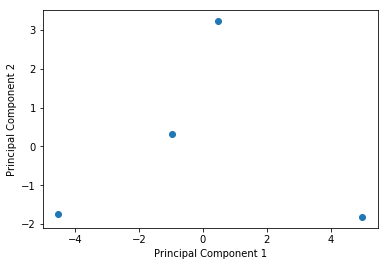

In [16]:
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [17]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [18]:
points.isnull().sum()

x    0
y    0
dtype: int64

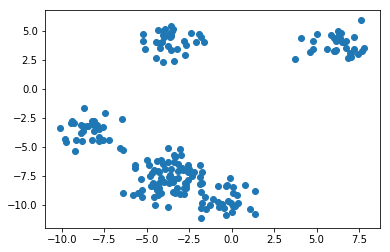

In [19]:
##### Your Code Here #####

plt.scatter(points.x, points.y)

In [0]:
df_centroid_x = points.x.mean()
df_centroid_y = points.y.mean()

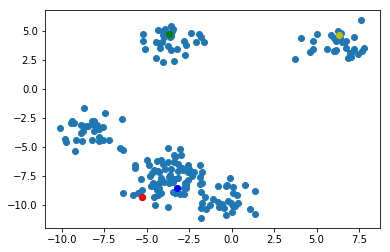

In [21]:
centroids = points.sample(4)

fig, ax = plt.subplots()
ax.plot(points.x, points.y)
ax = plt.subplot(1,1,1)
ax.scatter(points.x, points.y)
ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, 'or')
ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, 'ob')
ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, 'og')
ax.plot(centroids.iloc[3].x, centroids.iloc[3].y, 'oy')

plt.show()

In [22]:
import math
import numpy as np
from scipy.spatial import distance


def find_nearest_centroids(df, centroids, iteration):
  
  nearest_centroids = []
  
  for index, point in df.iterrows():
    distances = []
    
    for index, centroid in centroids.iterrows():
      dist = math.sqrt((point.x - centroid.x)**2 + (point.y - centroid.y)**2)
      distances.append(dist)
    
    nearest_centroids.append(np.argmin(distances))
    
  
  se = pd.Series(nearest_centroids)
  df['clusters_' + iteration] = se
  return df
    
first_pass = find_nearest_centroids(points, centroids, '1')
first_pass

,x,y,clusters_1
0,-7.846803,-3.421277,0
1,-3.554323,-6.884729,1
2,-0.192822,-9.671030,1
3,-6.401456,-5.223972,0
4,-0.804026,-9.704457,1
5,-4.977194,-6.138836,1
6,-8.118990,-3.624109,0
7,-8.145629,-2.787951,0
8,-3.568659,5.401781,2
9,-5.711709,-6.802013,0


In [0]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'yellow', 3: 'blue'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  ax.plot(centroids.iloc[3].x, centroids.iloc[3].y, "ok")

#   plt.axes().set_aspect('equal')
  grouped = df.groupby(column_header)
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()
  

In [0]:
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

centroids = get_centroids(first_pass, 'clusters_1')

In [25]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=4)
kmeans.fit(points)
labels = kmeans.labels_

print(labels)

[3 1 1 3 1 1 3 3 2 1 1 1 1 1 3 1 3 1 1 0 3 0 0 0 1 1 1 2 1 1 1 1 1 0 1 1 1
 1 2 1 1 0 2 2 2 1 1 1 3 1 0 3 3 2 0 1 1 2 2 3 0 1 3 2 0 2 0 2 3 2 1 1 1 1
 0 0 1 1 2 0 2 1 1 1 2 1 2 1 1 0 2 1 0 1 1 1 1 1 1 1 1 1 3 1 1 0 3 3 3 0 1
 0 1 3 1 1 2 2 0 2 0 1 1 3 1 3 1 0 2 3 1 3 1 3 2 2 1 0 3 1 2 1 1 0 1 2 1 2
 3 1 1 1 3 0 1 2 1 0 1 3 1 1 2 3 0 0 1 2 1 1 3 1 2 0 1 1 1 1 1 3 1 1 1 1 1
 1 3 0 2 1 1 3 0 3 1 2 0 0 1 1]


In [26]:
# Add our new labels to the dataframe
new_series = pd.Series(labels)
points['clusters'] = new_series.values

points.head()

,x,y,clusters_1,clusters
0,-7.846803,-3.421277,0,3
1,-3.554323,-6.884729,1,1
2,-0.192822,-9.671030,1,1
3,-6.401456,-5.223972,0,3
4,-0.804026,-9.704457,1,1


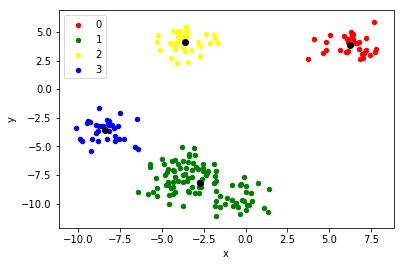

In [27]:
centroids = get_centroids(points, 'clusters')
plot_clusters(points, 'clusters', centroids)